In [10]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('./utilis/deeplearning.mplstyle')
np.set_printoptions(precision = 2) #reduced display precision on numpy arrays

In [12]:
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

In [15]:
print(f"X shape: {X_train.shape}, X type: {type(X_train)}")
print("----------------------------------------------------")
print(X_train)

X shape: (3, 4), X type: <class 'numpy.ndarray'>
----------------------------------------------------
[[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]


In [17]:
print(f"y shape: {y_train.shape}, y type: {type(y_train)}")
print("----------------------------------------------------")
print(y_train)

y shape: (3,), y type: <class 'numpy.ndarray'>
----------------------------------------------------
[460 232 178]


In [18]:
b_init = 785.1811367994083  #these are some initial selected values
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618]) #these are some initial selected values
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")

w_init shape: (4,), b_init type: <class 'float'>


## Prediction using multiple variables

In [19]:
def prediction(x, w, b):
    p = np.dot(x,w) + b
    return p


In [22]:
x_vec = X_train[0,:]
print(f"x_vec shape {x_vec.shape}, x_vec value: {x_vec}")
f_wb = prediction(x_vec, w_init, b_init)
print(f"f_wb shape {f_wb.shape}, prediction: {f_wb}")

x_vec shape (4,), x_vec value: [2104    5    1   45]
f_wb shape (), prediction: 459.9999976194083


## Compute Cost with Multiple Variables

In [26]:
def compute_cost(X, y, w, b):
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb_i = np.dot(w, X[i]) + b
        cost = cost + (f_wb_i - y[i])**2
    cost = cost/2
    return cost

In [27]:
cost = compute_cost(X_train, y_train, w_init, b_init)
print(f"Cost at optimal w: {cost}")

Cost at optimal w: 4.6736712137990024e-12


## Compute Gradient Descent With Multiple Variables

In [35]:
def compute_gradient(X, y, w, b):
    m, n = X.shape 
    dj_dw = np.zeros((n,))
    dj_db = 0

    for i in range(m):
        err = (np.dot(X[i], w) + b) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err * X[i, j]
        dj_db = dj_db + err
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_db, dj_dw

In [36]:
tmp_dj_db, tmp_dj_dw = compute_gradient(X_train, y_train, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: -1.6739251122999121e-06
dj_dw at initial w,b: 
 [-2.73e-03 -6.27e-06 -2.22e-06 -6.92e-05]


## Gradient Descent With Multiple Variables 

In [42]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in 

    for i in range(num_iters): 
        dj_db, dj_dw = gradient_function(X, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i<100000:
            J_history.append(cost_function(X,y,w,b))

        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
    return w,b, J_history

In [43]:
initial_w = np.zeros_like(w_init)
initial_b = 0.
iterations= 1000
alpha = 5.0e-7
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape
for i in range(m):
    print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

Iteration    0: Cost  7588.39   
Iteration  100: Cost  2087.97   
Iteration  200: Cost  2084.76   
Iteration  300: Cost  2081.58   
Iteration  400: Cost  2078.43   
Iteration  500: Cost  2075.30   
Iteration  600: Cost  2072.20   
Iteration  700: Cost  2069.13   
Iteration  800: Cost  2066.09   
Iteration  900: Cost  2063.07   
b,w found by gradient descent: -0.00,[ 0.2   0.   -0.01 -0.07] 
prediction: 426.19, target value: 460
prediction: 286.17, target value: 232
prediction: 171.47, target value: 178


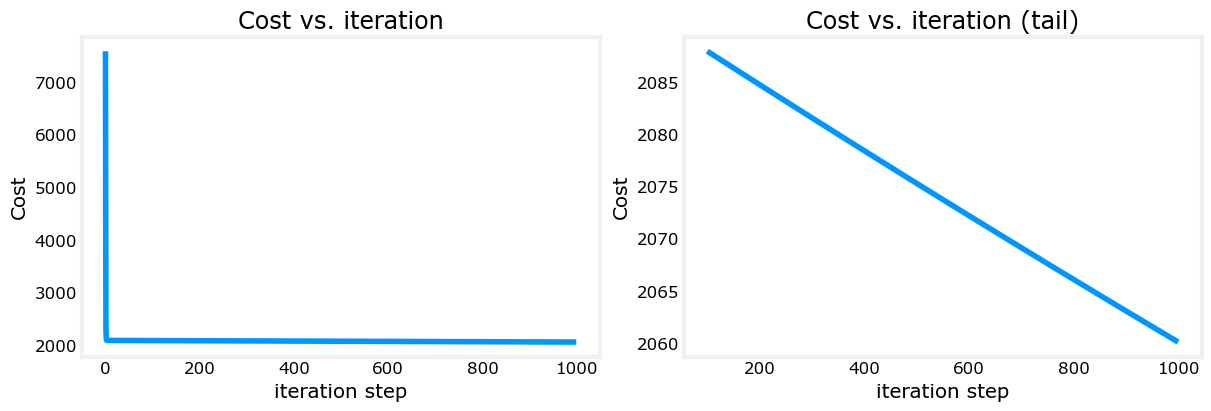

In [45]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()